In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
with open('project_transcriptome.json', 'r') as file:
    project_data = json.load(file)

In [3]:
tcga_t_colon_samples = project_data["datasets"]["TCGA-COAD-FPKM"]["groups"]["T-Colon"]["samples"]

In [4]:
meth_data = pd.read_csv('data/meth/methylation_data_TCGA-COAD_MLH1.csv', sep=';')

In [5]:
tcga_columns_to_keep = ['composite_element_ref'] + tcga_t_colon_samples
# Attention la methode utilisée dans le précédent notebook ne marche pas car il y'a des id présents dans l'index qui ne sont pas dans le dataset
# Il faut donc trier l'index pour ne garder que les id présents ET dans l'index, ET dans la bdd
available_columns = [col for col in tcga_columns_to_keep if col in meth_data.columns]
meth_data = meth_data[available_columns]

In [6]:
meth_data = meth_data.dropna()

In [18]:
meth_data.head()

,composite_element_ref,TCGA-3L-AA1B-01A,TCGA-4N-A93T-01A,TCGA-4T-AA8H-01A,TCGA-5M-AAT4-01A,TCGA-5M-AAT6-01A,TCGA-5M-AATE-01A,TCGA-A6-2671-01A,TCGA-A6-2672-01B,TCGA-A6-2675-01A,...,TCGA-NH-A8F8-01A,TCGA-QG-A5YV-01A,TCGA-QG-A5YW-01A,TCGA-QG-A5YX-01A,TCGA-QG-A5Z2-01A,TCGA-QL-A97D-01A,TCGA-RU-A8FL-01A,TCGA-SS-A7HO-01A,TCGA-T9-A92H-01A,TCGA-WS-AB45-01A
0,cg00893636,0.072051,0.061555,0.056886,0.059002,0.054262,0.066151,0.042042,0.559807,0.039544,...,0.061843,0.061292,0.049486,0.057119,0.540549,0.052830,0.100813,0.064362,0.036424,0.180118
2,cg02279071,0.034056,0.054561,0.375483,0.597774,0.317397,0.031562,0.282909,0.513646,0.116639,...,0.035466,0.063260,0.052953,0.030987,0.538897,0.532421,0.649980,0.034998,0.061002,0.268328
3,cg03192963,0.042714,0.035595,0.046331,0.050716,0.060534,0.048813,0.043826,0.550842,0.044171,...,0.046636,0.041531,0.049774,0.041390,0.535142,0.051791,0.033929,0.036974,0.038905,0.196684
4,cg03497419,0.033668,0.027540,0.036578,0.057094,0.039515,0.041149,0.031189,0.673868,0.026676,...,0.047139,0.037238,0.036576,0.033935,0.636442,0.165150,0.332227,0.030401,0.028941,0.229772
5,cg03901257,0.172714,0.085583,0.486550,0.606402,0.350063,0.047722,0.433518,0.545430,0.159261,...,0.037095,0.106247,0.051616,0.044689,0.563592,0.625961,0.670018,0.067067,0.031635,0.267862


In [8]:
meth_data_mean = meth_data.drop(columns='composite_element_ref')
mean_values = meth_data_mean.mean()
mean_data = pd.DataFrame(mean_values, columns=['mean'])
mean_data = mean_data.T
mean_data

,TCGA-3L-AA1B-01A,TCGA-4N-A93T-01A,TCGA-4T-AA8H-01A,TCGA-5M-AAT4-01A,TCGA-5M-AAT6-01A,TCGA-5M-AATE-01A,TCGA-A6-2671-01A,TCGA-A6-2672-01B,TCGA-A6-2675-01A,TCGA-A6-2679-01A,...,TCGA-NH-A8F8-01A,TCGA-QG-A5YV-01A,TCGA-QG-A5YW-01A,TCGA-QG-A5YX-01A,TCGA-QG-A5Z2-01A,TCGA-QL-A97D-01A,TCGA-RU-A8FL-01A,TCGA-SS-A7HO-01A,TCGA-T9-A92H-01A,TCGA-WS-AB45-01A
mean,0.125137,0.170311,0.23938,0.277413,0.169852,0.124218,0.2398,0.580376,0.18775,0.164595,...,0.070497,0.182035,0.146645,0.086137,0.591134,0.273076,0.309765,0.083646,0.104185,0.260686


In [9]:
tcga_expression_data = pd.read_csv('data/tcga/expression_data_tcga_coad_TCGA-COAD_log_fpkm_560_samples_42696_genes.csv', sep=';')
tcga_columns_to_keep = ['id_gene', 'gene_symbol'] + tcga_t_colon_samples
tcga_expression_data = tcga_expression_data[tcga_columns_to_keep]
tcga_expression_data = tcga_expression_data[tcga_expression_data['gene_symbol'] == 'MLH1']
tcga_expression_data

,id_gene,gene_symbol,TCGA-3L-AA1B-01A,TCGA-4N-A93T-01A,TCGA-4T-AA8H-01A,TCGA-5M-AAT4-01A,TCGA-5M-AAT6-01A,TCGA-5M-AATE-01A,TCGA-A6-2671-01A,TCGA-A6-2672-01A,...,TCGA-NH-A8F8-01A,TCGA-QG-A5YV-01A,TCGA-QG-A5YW-01A,TCGA-QG-A5YX-01A,TCGA-QG-A5Z2-01A,TCGA-QL-A97D-01A,TCGA-RU-A8FL-01A,TCGA-SS-A7HO-01A,TCGA-T9-A92H-01A,TCGA-WS-AB45-01A
3171,4292,MLH1,2.350469,2.127435,2.114967,2.252143,2.30492,2.370611,2.229219,0.959251,...,2.508657,2.464355,2.199971,2.599841,0.867817,2.147014,1.69488,2.771379,2.644156,2.136421


In [10]:
tcga_expression_data = tcga_expression_data.drop(columns = ['id_gene','gene_symbol'])
tcga_expression_data.index = ['expression']
tcga_expression_data

,TCGA-3L-AA1B-01A,TCGA-4N-A93T-01A,TCGA-4T-AA8H-01A,TCGA-5M-AAT4-01A,TCGA-5M-AAT6-01A,TCGA-5M-AATE-01A,TCGA-A6-2671-01A,TCGA-A6-2672-01A,TCGA-A6-2672-01B,TCGA-A6-2674-01A,...,TCGA-NH-A8F8-01A,TCGA-QG-A5YV-01A,TCGA-QG-A5YW-01A,TCGA-QG-A5YX-01A,TCGA-QG-A5Z2-01A,TCGA-QL-A97D-01A,TCGA-RU-A8FL-01A,TCGA-SS-A7HO-01A,TCGA-T9-A92H-01A,TCGA-WS-AB45-01A
expression,2.350469,2.127435,2.114967,2.252143,2.30492,2.370611,2.229219,0.959251,1.370332,2.809641,...,2.508657,2.464355,2.199971,2.599841,0.867817,2.147014,1.69488,2.771379,2.644156,2.136421


In [11]:
data = pd.concat([tcga_expression_data, mean_data])
data = data.dropna(axis=1)
data = data.T
data

,expression,mean
TCGA-3L-AA1B-01A,2.350469,0.125137
TCGA-4N-A93T-01A,2.127435,0.170311
TCGA-4T-AA8H-01A,2.114967,0.239380
TCGA-5M-AAT4-01A,2.252143,0.277413
TCGA-5M-AAT6-01A,2.304920,0.169852
...,...,...
TCGA-QL-A97D-01A,2.147014,0.273076
TCGA-RU-A8FL-01A,1.694880,0.309765
TCGA-SS-A7HO-01A,2.771379,0.083646
TCGA-T9-A92H-01A,2.644156,0.104185


In [12]:
stats.pearsonr(data['expression'], data['mean'])

PearsonRResult(statistic=-0.8194910606501813, pvalue=5.428476534082747e-67)

Echantillons MSI (en bleu) :  34


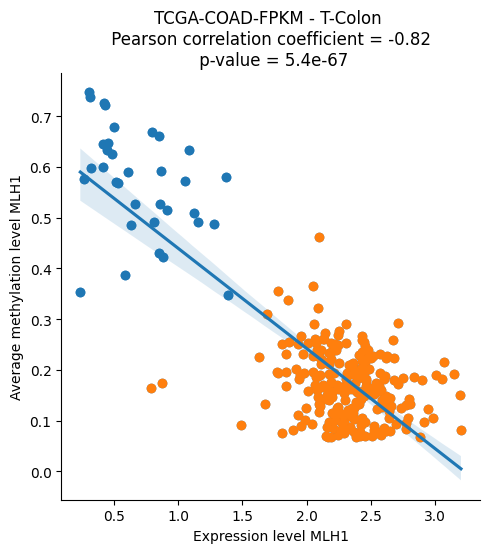

In [13]:
seuil_methylation = 0.3
seuil_expression = 1.5

cluster_haut_methylation = data[(data['mean'] > seuil_methylation) & (data['expression'] < seuil_expression)]
cluster_bas_methylation = data[(data['mean'] <= seuil_methylation) | (data['expression'] >= seuil_expression)]

print('Echantillons MSI (en bleu) : ', len(cluster_haut_methylation))

sns.lmplot(x='expression',y='mean', data = data)
plt.scatter(cluster_haut_methylation['expression'], cluster_haut_methylation['mean'])
plt.scatter(cluster_bas_methylation['expression'], cluster_bas_methylation['mean'])
plt.title('TCGA-COAD-FPKM - T-Colon \n Pearson correlation coefficient = -0.82 \n p-value = 5.4e-67')
plt.xlabel('Expression level MLH1')
plt.ylabel('Average methylation level MLH1')
plt.show()